In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
from sklearn import preprocessing

In [3]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [4]:
launch_data.tail()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
295,NaN,2020-05-28,NaN,Cape Canaveral,NaN,NaN,87.0,71.0,79.36,NaN,87.0,70.0,79.0,0.00,0.15,S,20.0,10.0,NaN,NaN,NaN,30.08,NaN,13:45:00,Thunder,NaN
296,NaN,2020-05-29,NaN,Cape Canaveral,NaN,NaN,86.0,72.0,79.50,NaN,88.0,70.0,79.0,0.01,0.16,SE,18.0,10.0,NaN,NaN,NaN,30.05,NaN,13:46:00,Fair,NaN
297,Space X Dragon,2020-05-30,20:22:00,Cape Canaveral,Crewed,Y,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,SE,16.0,10.0,7.0,NaN,NaN,30.03,NaN,13:47:00,Fair,Rain before launch
298,NaN,2020-05-31,NaN,Cape Canaveral,NaN,NaN,87.0,72.0,79.70,NaN,88.0,70.0,79.0,0.46,0.16,E,13.0,10.0,NaN,NaN,NaN,30.01,NaN,13:47:00,Cloudy,NaN
299,NaN,2020-06-01,NaN,Cape Canaveral,NaN,NaN,85.0,76.0,80.31,NaN,88.0,70.0,79.0,0.00,0.19,E,16.0,10.0,NaN,NaN,NaN,30.08,NaN,13:48:00,Cloudy,NaN


In [5]:
launch_data['Condition'].unique()

array(['Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Fair', 'Windy',
       'T-Storm', 'Rain', 'Thunder', nan, 'Partly Cloudly', 'Light Rain',
       'Heavy T-Storm'], dtype=object)

In [6]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [7]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [8]:
launch_data.isnull().sum()

Name                            240
Date                              0
Time (East Coast)               241
Location                          0
Crewed or Uncrewed              240
Launched?                       240
High Temp                         1
Low Temp                          1
Ave Temp                          1
Temp at Launch Time             241
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Wind Speed at Launch Time       241
Hist Ave Max Wind Speed         300
Hist Ave Visibility             300
Sea Level Pressure                1
Hist Ave Sea Level Pressure     300
Day Length                        2
Condition                         2
Notes                           297
dtype: int64

In [9]:
launch_data.drop(['Name','Date','Time (East Coast)','Location','Notes','Day Length','Sea Level Pressure'],axis=1,inplace=True)

In [10]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            60 non-null     object 
 1   Launched?                     60 non-null     object 
 2   High Temp                     299 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Temp at Launch Time           59 non-null     float64
 6   Hist High Temp                299 non-null    float64
 7   Hist Low Temp                 299 non-null    float64
 8   Hist Ave Temp                 299 non-null    float64
 9   Percipitation at Launch Time  299 non-null    float64
 10  Hist Ave Percipitation        299 non-null    float64
 11  Wind Direction                299 non-null    object 
 12  Max Wind Speed                299 non-null    float64
 13  Visib

In [11]:
launch_data.drop(['Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure'],axis=1,inplace=True)

In [12]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            60 non-null     object 
 1   Launched?                     60 non-null     object 
 2   High Temp                     299 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Temp at Launch Time           59 non-null     float64
 6   Hist High Temp                299 non-null    float64
 7   Hist Low Temp                 299 non-null    float64
 8   Hist Ave Temp                 299 non-null    float64
 9   Percipitation at Launch Time  299 non-null    float64
 10  Hist Ave Percipitation        299 non-null    float64
 11  Wind Direction                299 non-null    object 
 12  Max Wind Speed                299 non-null    float64
 13  Visib

In [13]:
launch_data['Launched?'].fillna('X',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('unknown',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('unknown',inplace=True)

In [14]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     299 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Temp at Launch Time           59 non-null     float64
 6   Hist High Temp                299 non-null    float64
 7   Hist Low Temp                 299 non-null    float64
 8   Hist Ave Temp                 299 non-null    float64
 9   Percipitation at Launch Time  299 non-null    float64
 10  Hist Ave Percipitation        299 non-null    float64
 11  Wind Direction                300 non-null    object 
 12  Max Wind Speed                299 non-null    float64
 13  Visib

In [15]:
label_encoder = preprocessing.LabelEncoder()

launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Launched?'] = label_encoder.fit_transform(launch_data['Launched?'])
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [16]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    int32  
 1   Launched?                     300 non-null    int32  
 2   High Temp                     299 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Temp at Launch Time           59 non-null     float64
 6   Hist High Temp                299 non-null    float64
 7   Hist Low Temp                 299 non-null    float64
 8   Hist Ave Temp                 299 non-null    float64
 9   Percipitation at Launch Time  299 non-null    float64
 10  Hist Ave Percipitation        299 non-null    float64
 11  Wind Direction                300 non-null    int32  
 12  Max Wind Speed                299 non-null    float64
 13  Visib

In [17]:
launch_data.head()

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,2,1,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,NaN,0
1,2,1,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,NaN,0
2,1,2,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,11.0,0
3,2,1,76.0,57.0,66.04,NaN,75.0,55.0,65.0,0.0,0.08,1,10.0,10.0,NaN,6
4,2,1,79.0,60.0,70.52,NaN,75.0,55.0,65.0,0.0,0.09,0,12.0,10.0,NaN,6


In [18]:
launch_data.median()

Crewed or Uncrewed               2.00
Launched?                        1.00
High Temp                       82.00
Low Temp                        51.00
Ave Temp                        71.61
Temp at Launch Time             77.00
Hist High Temp                  82.00
Hist Low Temp                   64.00
Hist Ave Temp                   72.00
Percipitation at Launch Time     0.00
Hist Ave Percipitation           0.11
Wind Direction                   3.00
Max Wind Speed                  16.00
Visibility                      10.00
Wind Speed at Launch Time       10.00
Condition                        1.00
dtype: float64

In [19]:
launch_data = launch_data.apply(lambda x: x.fillna(x.median()),axis=0)

In [20]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    int32  
 1   Launched?                     300 non-null    int32  
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Temp at Launch Time           300 non-null    float64
 6   Hist High Temp                300 non-null    float64
 7   Hist Low Temp                 300 non-null    float64
 8   Hist Ave Temp                 300 non-null    float64
 9   Percipitation at Launch Time  300 non-null    float64
 10  Hist Ave Percipitation        300 non-null    float64
 11  Wind Direction                300 non-null    int32  
 12  Max Wind Speed                300 non-null    float64
 13  Visib

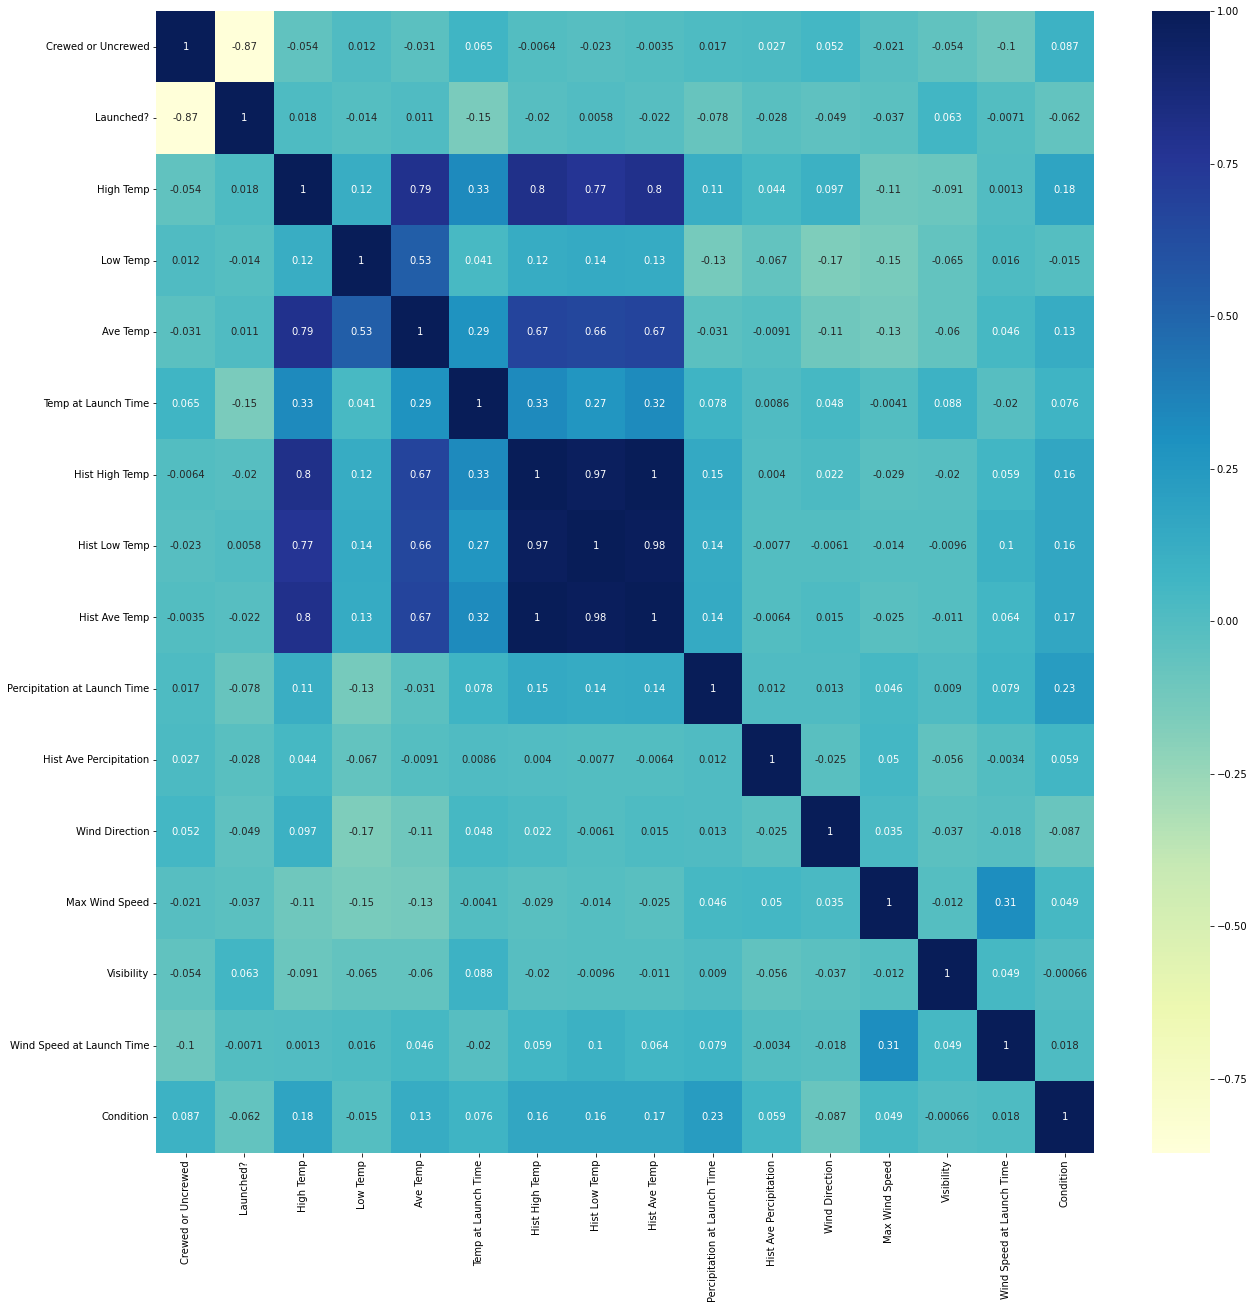

In [21]:
plt.figure(figsize=(21,21))
sns.heatmap(launch_data.corr(), annot=True, cmap='YlGnBu');
plt.show()

In [22]:
launch_data.drop(['Hist Low Temp','Wind Speed at Launch Time'],axis=1,inplace=True)

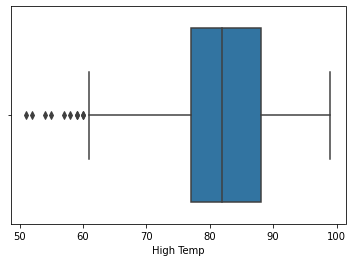

In [23]:
sns.boxplot(x=launch_data['High Temp']);
plt.show()

<AxesSubplot:xlabel='Launched?', ylabel='High Temp'>

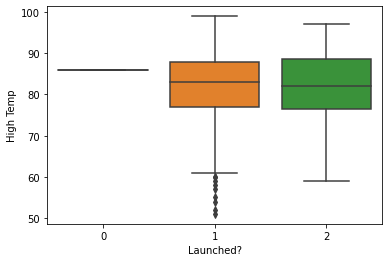

In [24]:
sns.boxplot(x="Launched?", y="High Temp", data=launch_data)

In [25]:
dfw = launch_data['High Temp']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [26]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

38     58.0
39     59.0
45     54.0
113    57.0
114    52.0
170    51.0
171    55.0
172    59.0
209    60.0
225    60.0
Name: High Temp, dtype: float64

In [27]:
launch_data.drop([38,39,45,113,114,170,171,172,209,225],inplace=True)

<AxesSubplot:>

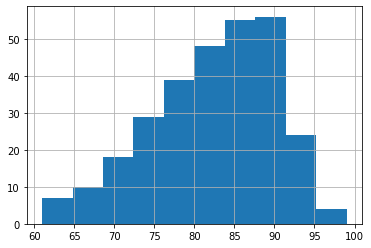

In [28]:
launch_data['High Temp'].hist()

In [29]:
launch_data.head()

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Condition
0,2,1,75.0,68.0,71.00,77.0,75.0,65.0,0.0,0.08,0,16.0,15.0,0
1,2,1,78.0,70.0,73.39,77.0,75.0,65.0,0.0,0.09,0,14.0,10.0,0
2,1,2,73.0,0.0,60.21,62.0,75.0,65.0,0.0,0.09,2,15.0,10.0,0
3,2,1,76.0,57.0,66.04,77.0,75.0,65.0,0.0,0.08,1,10.0,10.0,6
4,2,1,79.0,60.0,70.52,77.0,75.0,65.0,0.0,0.09,0,12.0,10.0,6


In [30]:
X = launch_data.loc[:,launch_data.columns!="Launched?"]

In [31]:
y = launch_data["Launched?"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [34]:
X_train.shape

(232, 13)

In [35]:
X_test.shape

(58, 13)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [38]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[ 0,  0,  1],
       [ 0, 45,  0],
       [ 0,  0, 12]], dtype=int64)

In [41]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.9827586206896551

In [42]:
import pickle

In [43]:
pickle.dump(rf_clf,open('Weather_analysis.pkl','wb'))